In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss

In [3]:
sns.set_theme()

In [8]:
df_yield = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/yield.csv?token=AKCY5EMQEPS5O7SS4AXLHGTA3TMZ2%27').drop(columns='Unnamed: 0')
df_planted_area = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/planted_area.csv').drop(columns='Unnamed: 0')

In [9]:
estados = ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'RO', 'TO']
df_states_yield = df_yield[['Year', 'Grain']].copy()
df_states_area = df_planted_area[['Year', 'Grain']].copy()
for estado in estados:
    df_states_area[estado] = df_planted_area.filter(regex=(".*\(({})\)".format(estado)), axis=1).sum(axis=1, numeric_only=True)
    df_states_yield[estado] = df_yield.filter(regex=(".*\(({})\)".format(estado)), axis=1).sum(axis=1, numeric_only=True)

In [10]:
df_group_yield = df_states_yield.groupby('Year').sum().drop(index=range(1974,2004)).copy()
df_group_area = df_states_area.groupby('Year').sum().drop(index=range(1974,2004)).copy()

In [12]:
df_amazon = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv')
df_amazon.set_index('Ano/Estados', inplace=True)
df_amazon.head()

,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
Ano/Estados,,,,,,,,,,
2004,728,1232,46,755,11814,8870,3858,311,158,27772
2005,592,775,33,922,7145,5899,3244,133,271,19014
2006,398,788,30,674,4333,5659,2049,231,124,14286
2007,184,610,39,631,2678,5526,1611,309,63,11651
2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [13]:
df_group_yield.corrwith(df_amazon, axis=0)

AC          -0.184081
AM          -0.713637
AP          -0.645171
MA          -0.628207
MT          -0.459453
PA          -0.589495
RR           0.001081
RO          -0.330934
TO          -0.645630
AMZ LEGAL         NaN
dtype: float64

Nenhum dos estados tem correlação alta e positiva entre a área desmatada e a produtividade de grãos.

In [14]:
df_group_area.corrwith(df_amazon, axis=0)

AC           0.083129
AM          -0.406421
AP          -0.553155
MA          -0.809872
MT          -0.520343
PA          -0.353993
RR           0.179666
RO          -0.437772
TO          -0.539607
AMZ LEGAL         NaN
dtype: float64

Também não existe uma alta correlação positiva entre a área desmatada e área plantada.

Analisando o Amazonas (maior correlação em módulo com a produtividade):

In [ ]:
df_AM = pd.DataFrame(columns=['Área desmatada', 'Área plantada', 'Produtividade de grãos'])
df_AM['Área desmatada'] = df_amazon['AM']
df_AM['Produtividade de grãos'] = df_group_yield['AM']
df_AM['Área plantada'] = df_group_area['AM']

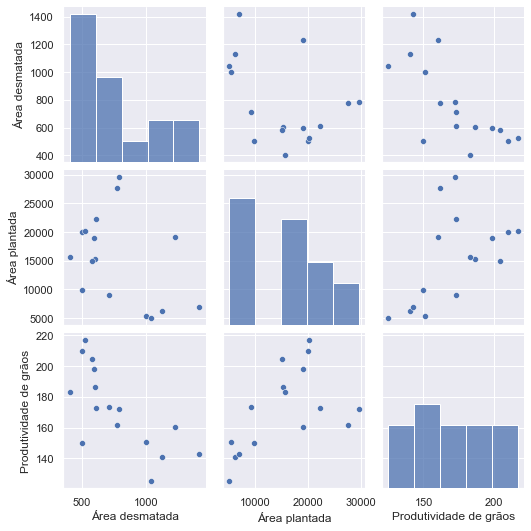

In [17]:
sns.pairplot(df_AM)

No estado de Amazonas, podemos ver que a produção de grãos permaneceu, em geral, constante durante o período analisado, enquanto a área desmatada e a área plantada diminuiram.

In [32]:
prod_AM = df_AM['Produtividade de grãos']
desmatada_AM = df_AM['Área desmatada']
plantada_AM = df_AM['Área plantada']
lr1_AM = ss.linregress(prod_AM, desmatada_AM)
lr2_AM = ss.linregress(plantada_AM, desmatada_AM)

In [33]:
r2_AM_produtividade = round(lr1_AM.rvalue**2, 3)
r2_AM_plantada = round(lr2_AM.rvalue**2, 3)
r2_AM_produtividade, r2_AM_plantada

(0.509, 0.165)

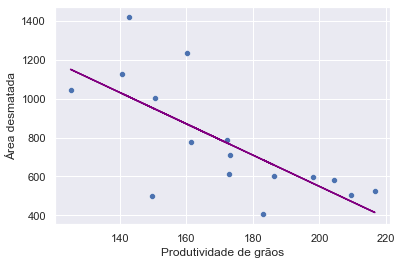

In [34]:
sns.scatterplot(x=prod_AM, y=desmatada_AM)
y_hat = lr1_AM.slope * prod_AM + lr1_AM.intercept
plt.plot(prod_AM, y_hat, color="purple")

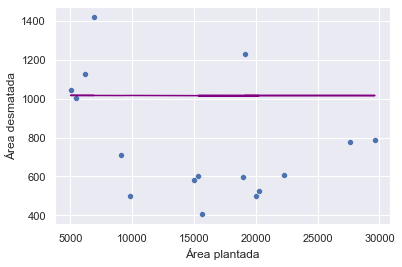

In [35]:
sns.scatterplot(x=plantada_AM, y=desmatada_AM)
y_hat = lr2_AM.slope * prod_AM + lr2_AM.intercept
plt.plot(plantada_AM, y_hat, color="purple")

Analisando o Maranhão (maior correlação em módulo com a área plantada):

In [25]:
df_MA = pd.DataFrame(columns=['Área desmatada', 'Área plantada', 'Produtividade de grãos'])
df_MA['Área desmatada'] = df_amazon['MA']
df_MA['Produtividade de grãos'] = df_group_yield['MA']
df_MA['Área plantada'] = df_group_area['MA']

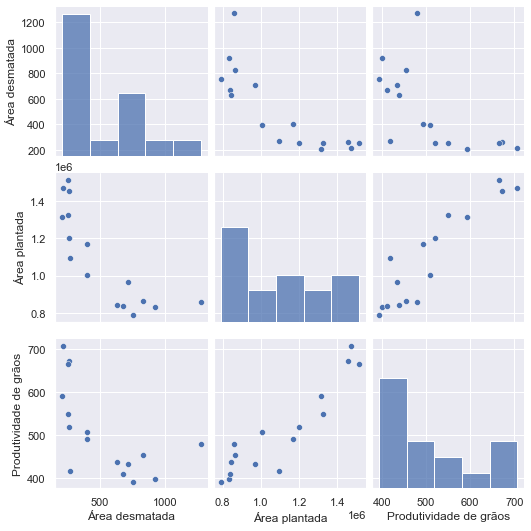

In [26]:
sns.pairplot(df_MA)

In [27]:
prod_MA = df_MA['Produtividade de grãos']
desmatada_MA = df_MA['Área desmatada']
plantada_MA = df_MA['Área plantada']
lr1_MA = ss.linregress(prod_MA, desmatada_MA)
lr2_MA = ss.linregress(plantada_MA, desmatada_MA)

In [31]:
r2_MA_produtividade = round(lr1_MA.rvalue**2, 3)
r2_MA_plantada = round(lr2_MA.rvalue**2, 3)
r2_MA_produtividade, r2_MA_plantada

(0.395, 0.656)

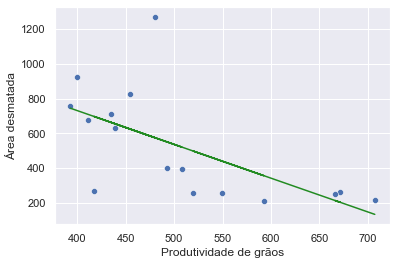

In [29]:
sns.scatterplot(x=prod_MA, y=desmatada_MA)
y_prod_MA = lr1_MA.slope * prod_MA + lr1_MA.intercept
plt.plot(prod_MA, y_prod_MA, color="forestgreen")

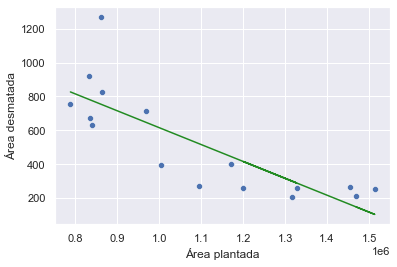

In [30]:
sns.scatterplot(x=plantada_MA, y=desmatada_MA)
y_area_MA = lr2_MA.slope * plantada_MA + lr2_MA.intercept
plt.plot(plantada_MA, y_area_MA, color="forestgreen")